In [9]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as matplot
import seaborn as seaborn
seaborn.set_theme(style="whitegrid")

In [10]:
fake_postings = pd.read_csv('../data/fake_job_postings.csv')
fake_postings

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [11]:
# Get jobs posted only in US
fake_postings.location = fake_postings.location.fillna('blank')
fake_postings_US = fake_postings[fake_postings['location'].str.contains("US")]

In [12]:
# Extracting state and city from the 'location' column and creating a DataFrame
country_state_city_data_list = []
for location_entry in fake_postings_US.location:
    country_state_city_data = location_entry.split(',')
    country_state_city_data_list.append(country_state_city_data)

country_state_city_df = pd.DataFrame(country_state_city_data_list)
state_city_df = country_state_city_df[[1, 2]].rename(columns={1: "state", 2:'city'})
state_city_df.city = state_city_df.city.str.strip()
state_city_df.state = state_city_df.state.str.strip()
state_city_df['address'] = state_city_df.state + ", " + state_city_df.city
state_city_df

,state,city,address
0,NY,New York,"NY, New York"
1,IA,Wever,"IA, Wever"
2,DC,Washington,"DC, Washington"
3,FL,Fort Worth,"FL, Fort Worth"
4,MD,,"MD,"
...,...,...,...
10651,CA,San Francisco,"CA, San Francisco"
10652,NC,Charlotte,"NC, Charlotte"
10653,,,","
10654,PA,Philadelphia,"PA, Philadelphia"


In [13]:
fake_postings_US = fake_postings_US.reset_index()
fake_postings_US = fake_postings_US.join(state_city_df)
del fake_postings_US['index']

fake_postings_US

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,state,city,address
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,...,0,Other,Internship,NaN,NaN,Marketing,0,NY,New York,"NY, New York"
1,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,0,IA,Wever,"IA, Wever"
2,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,DC,Washington,"DC, Washington"
3,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,FL,Fort Worth,"FL, Fort Worth"
4,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,0,MD,,"MD,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10651,17873,Product Manager,"US, CA, San Francisco",Product Development,NaN,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,0,...,0,Full-time,NaN,NaN,Internet,Product Management,0,CA,San Francisco,"CA, San Francisco"
10652,17874,Recruiting Coordinator,"US, NC, Charlotte",NaN,NaN,NaN,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,NaN,0,...,0,Contract,NaN,NaN,Utilities,NaN,0,NC,Charlotte,"NC, Charlotte"
10653,17875,JavaScript Developer,"US, ,",NaN,80000-100000,NaN,"Sr, JavaScript Developer Experience : 4-10 yea...",NaN,NaN,0,...,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Information Technology,0,,,","
10654,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,...,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,PA,Philadelphia,"PA, Philadelphia"


In [14]:
fake_postings_US = fake_postings_US[fake_postings_US['city'].notna()]
fake_postings_US = fake_postings_US[fake_postings_US['state'].notna()]

In [15]:
fake_postings_US.info

<bound method DataFrame.info of        job_id                                              title  \
0           1                                   Marketing Intern   
1           3            Commissioning Machinery Assistant (CMA)   
2           4                  Account Executive - Washington DC   
3           5                                Bill Review Manager   
4           6                                   Accounting Clerk   
...       ...                                                ...   
10651   17873                                    Product Manager   
10652   17874                             Recruiting Coordinator   
10653   17875                               JavaScript Developer   
10654   17877                                 Payroll Accountant   
10655   17878  Project Cost Control Staff Engineer - Cost Con...   

                    location           department  salary_range  \
0           US, NY, New York            Marketing           NaN   
1              US

In [16]:
fake_postings_US

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,state,city,address
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,...,0,Other,Internship,NaN,NaN,Marketing,0,NY,New York,"NY, New York"
1,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,0,IA,Wever,"IA, Wever"
2,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,DC,Washington,"DC, Washington"
3,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,FL,Fort Worth,"FL, Fort Worth"
4,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,0,MD,,"MD,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10651,17873,Product Manager,"US, CA, San Francisco",Product Development,NaN,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,0,...,0,Full-time,NaN,NaN,Internet,Product Management,0,CA,San Francisco,"CA, San Francisco"
10652,17874,Recruiting Coordinator,"US, NC, Charlotte",NaN,NaN,NaN,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,NaN,0,...,0,Contract,NaN,NaN,Utilities,NaN,0,NC,Charlotte,"NC, Charlotte"
10653,17875,JavaScript Developer,"US, ,",NaN,80000-100000,NaN,"Sr, JavaScript Developer Experience : 4-10 yea...",NaN,NaN,0,...,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Information Technology,0,,,","
10654,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,...,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,PA,Philadelphia,"PA, Philadelphia"


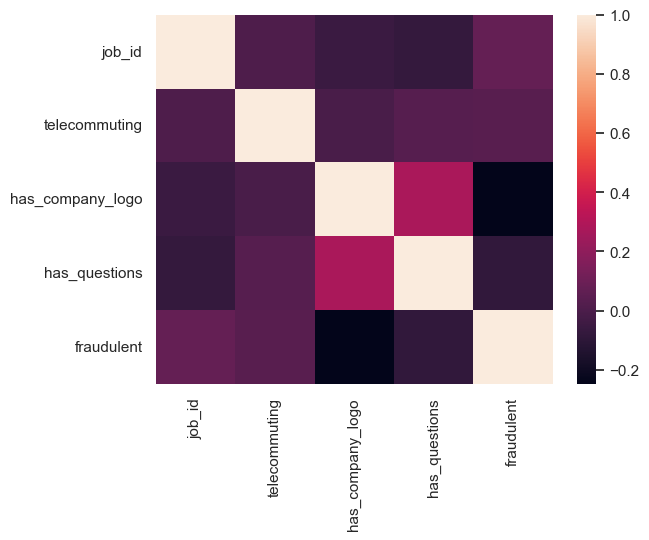

In [17]:
# Select only numeric columns for correlation calculation
numeric_columns = fake_postings_US.select_dtypes(include=numpy.number)

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()
seaborn.heatmap(correlation_matrix)
matplot.show()

In [18]:
len(fake_postings_US[fake_postings_US.fraudulent == 0]), len(fake_postings_US[fake_postings_US.fraudulent == 1]), 

(9868, 725)

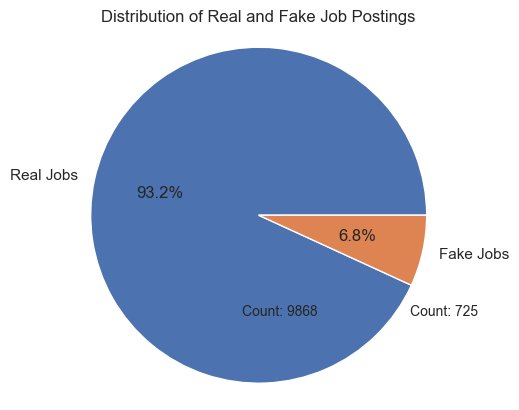

In [62]:
# Calculate fraudulent counts
fraudulent_counts = fake_postings_US['fraudulent'].value_counts()

# Define labels
labels = ['Real Jobs', 'Fake Jobs']

# Plot pie chart
matplot.pie(fraudulent_counts, labels=labels, autopct='%1.1f%%')

# Add counts alongside percentages
for i, count in enumerate(fraudulent_counts):
    matplot.text(i-0.1, -0.6, f'Count: {count}', fontsize=10)

# Add title and ensure equal aspect ratio
matplot.title('Distribution of Real and Fake Job Postings')
matplot.axis('equal')

# Show plot
matplot.show()

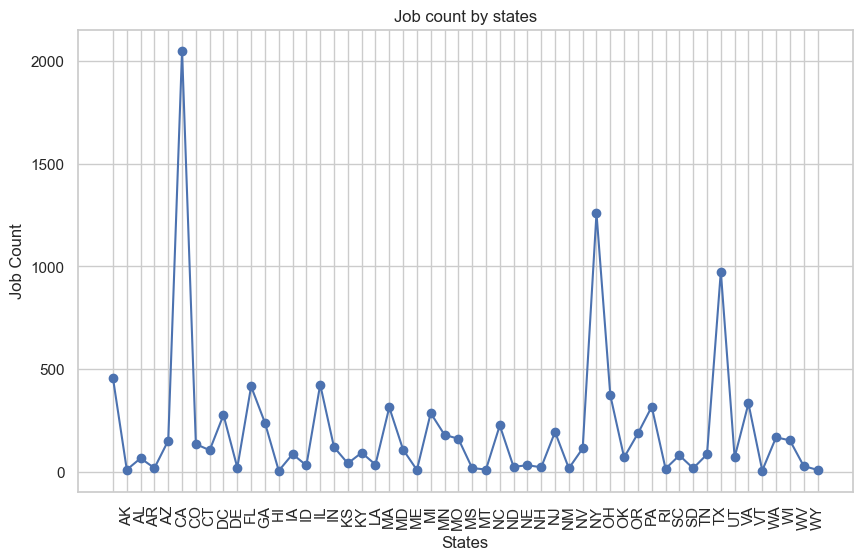

In [20]:
matplot.figure(figsize=(10,6))
states = fake_postings_US.groupby('state')
state_counts = states.fraudulent.count()
all_states = state_counts.index.tolist()  # Get all state names
state_counts.plot(kind='line', marker='o', title='Job count by states')
matplot.xticks(range(len(all_states)), all_states, rotation=90)  # Set custom x-axis tick labels
matplot.ylabel('Job Count')
matplot.xlabel('States')
matplot.grid(True)
matplot.show()

In [21]:
def plot_fraudulent_count(data, title, x, x_title, y_title):
    matplot.figure(figsize=(10, 6))
    order = data[data['fraudulent'] == 1][x].value_counts().index
    seaborn.countplot(x=x, data=data, hue="fraudulent", order=order)
    matplot.title(title)
    matplot.xticks(rotation=90)
    matplot.xlabel(x_title)
    matplot.ylabel(y_title)
    matplot.show()

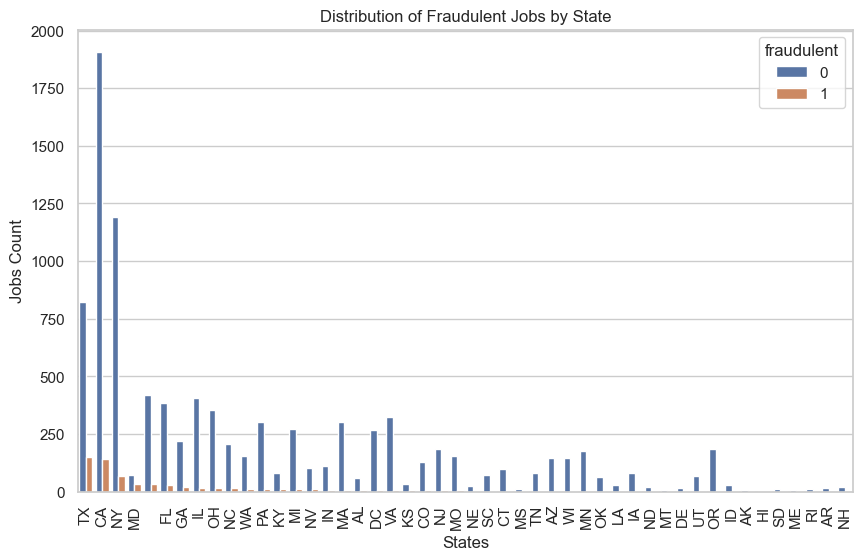

In [22]:
plot_fraudulent_count(fake_postings_US, 'Distribution of Fraudulent Jobs by State', 'state', 'States', 'Jobs Count')

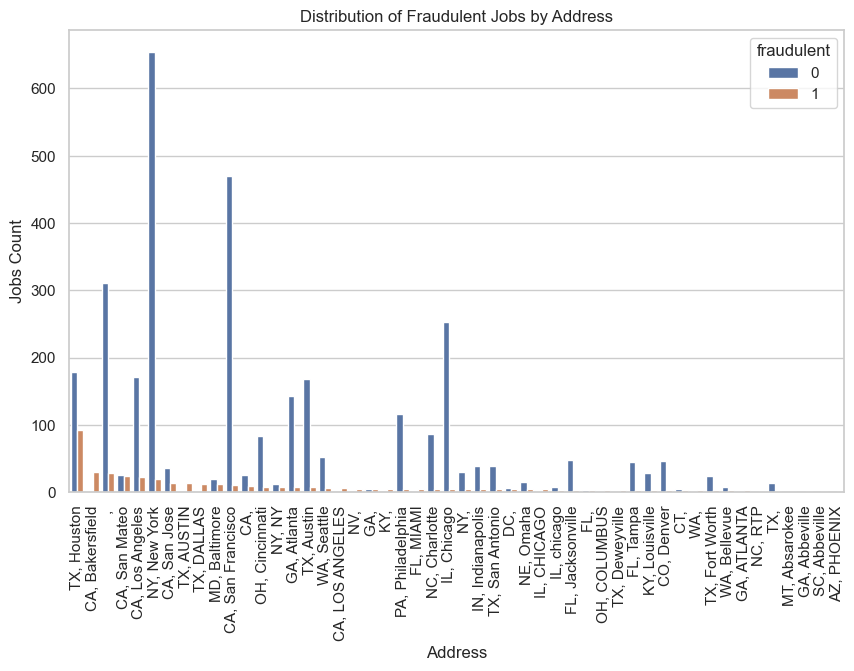

In [23]:
matplot.figure(figsize=(10,6))
order = fake_postings_US[fake_postings_US['fraudulent'] == 1]['address'].value_counts().iloc[:50].index
seaborn.countplot(x='address', data=fake_postings_US, hue="fraudulent", order=order)
matplot.title('Distribution of Fraudulent Jobs by Address')
matplot.xticks(rotation=90)
matplot.xlabel('Address')
matplot.ylabel('Jobs Count')
matplot.show()

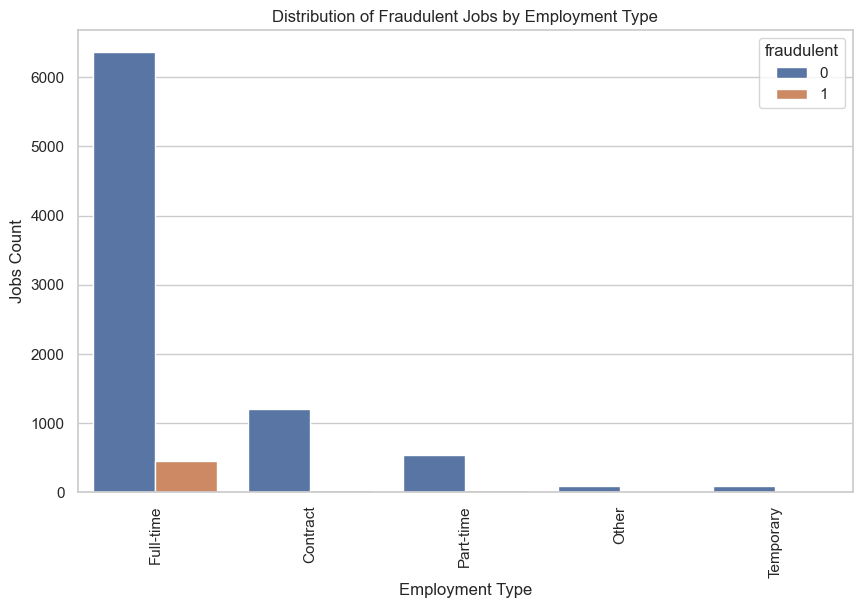

In [24]:
plot_fraudulent_count(fake_postings_US, 'Distribution of Fraudulent Jobs by Employment Type', 'employment_type', 'Employment Type', 'Jobs Count')

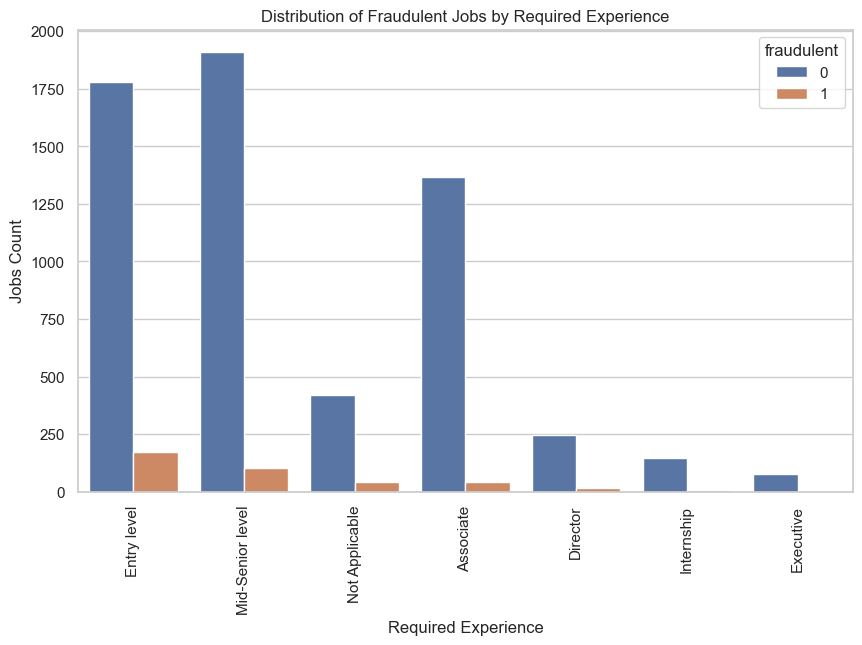

In [25]:
plot_fraudulent_count(fake_postings_US, 'Distribution of Fraudulent Jobs by Required Experience', 'required_experience', 'Required Experience', 'Jobs Count')

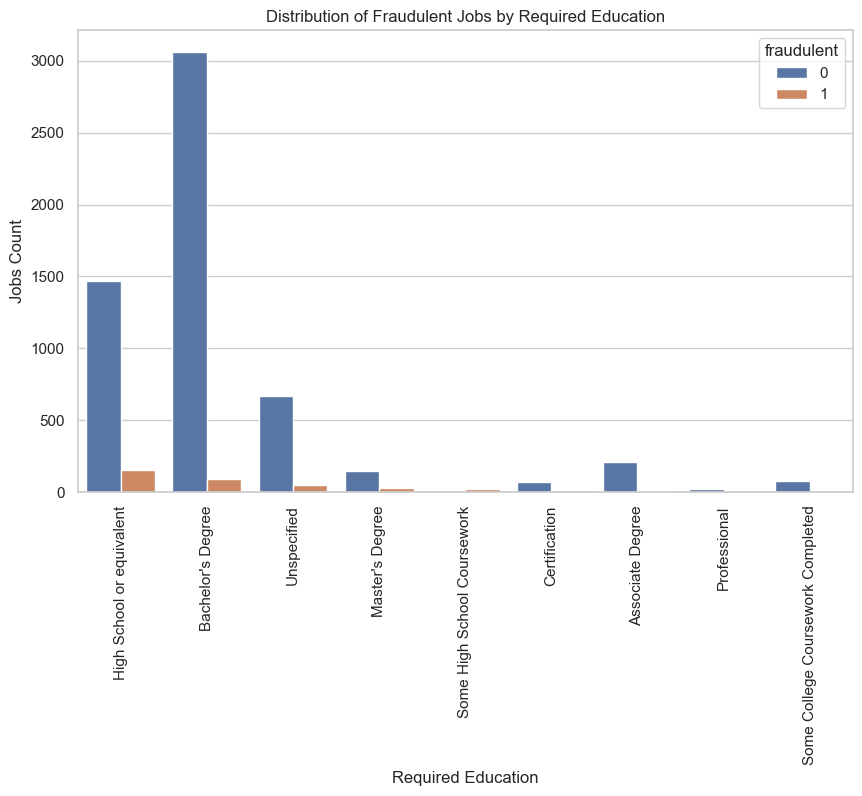

In [26]:
plot_fraudulent_count(fake_postings_US, 'Distribution of Fraudulent Jobs by Required Education', 'required_education', 'Required Education', 'Jobs Count')

In [27]:
# Calculate the ratio of fraudulent to real job postings for each state and city combination
fraudulent_jobs = fake_postings_US.fraudulent == 1
fraudulent_counts_for_every_address = fake_postings_US[fraudulent_jobs].groupby('address').address.count()
actual_jobs = fake_postings_US.fraudulent == 0
non_fraudulent_counts_for_every_address = fake_postings_US[actual_jobs].groupby('address').address.count()

# Compute the ratio and store it in a DataFrame
fraudulent_jobs_to_actual_jobs_ratio = round(fraudulent_counts_for_every_address / non_fraudulent_counts_for_every_address, 2)
fraudulent_jobs_to_actual_jobs_ratio_pd = pd.DataFrame({'address': fraudulent_jobs_to_actual_jobs_ratio.index, 'ratio': fraudulent_jobs_to_actual_jobs_ratio.values})

In [28]:
# Merge the ratio information back into the original DataFrame
fake_postings_US = fake_postings_US.merge(fraudulent_jobs_to_actual_jobs_ratio_pd)

In [29]:
fake_postings_US.ratio = fake_postings_US.ratio.fillna(0)

In [30]:
fraudulent_jobs_to_actual_jobs_ratio_plot = fraudulent_jobs_to_actual_jobs_ratio_pd[fraudulent_jobs_to_actual_jobs_ratio_pd.ratio >= 1]

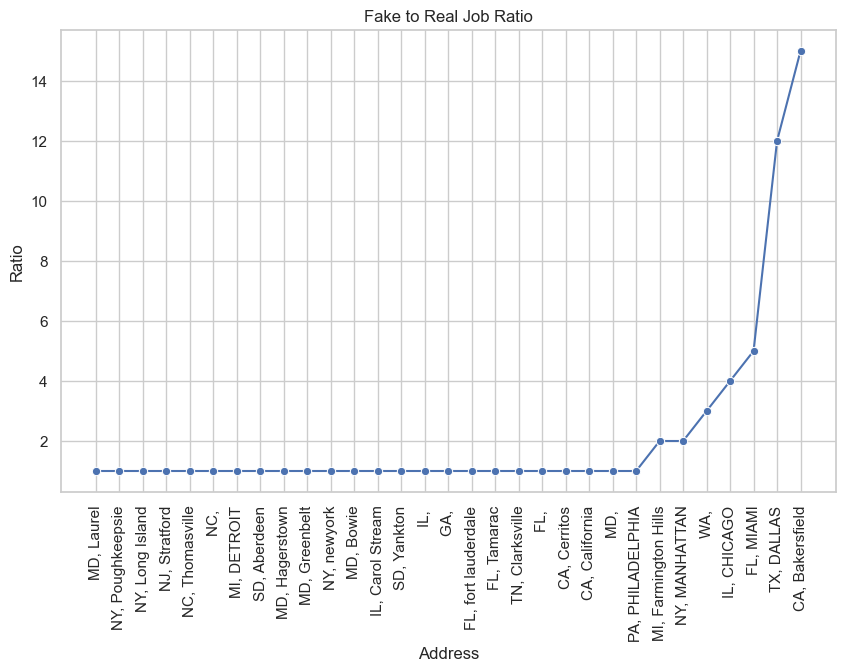

In [31]:
matplot.figure(figsize=(10, 6))
seaborn.lineplot(data=fraudulent_jobs_to_actual_jobs_ratio_plot.sort_values(by='ratio'), x='address', y='ratio', marker='o')
matplot.xticks(rotation=90)
matplot.title('Fake to Real Job Ratio')
matplot.xlabel('Address')
matplot.ylabel('Ratio')
matplot.show()

In [32]:
def plot_missing_values(feature, title):
  # Get data for missing values in the specified feature
  y_axis = fake_postings_US[fake_postings_US[feature].isna()][['fraudulent', feature]]
  value_counts = y_axis.fraudulent.value_counts()

  # Calculate percentages
  total = value_counts.sum()

  # Map labels (0 -> non-fraudulent, 1 -> fraudulent)
  fraudulent_map = {0: 'Non-Fraudulent', 1: 'Fraudulent'}
  category_labels = [fraudulent_map[x] for x in value_counts.index]

  # Create the pie chart
  matplot.figure(figsize=(10, 6))  # Adjust figure size for better layout
  wedges, texts, autotexts = matplot.pie(value_counts, labels=category_labels, autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100 * total)})")

  # Move legend to top right corner
  matplot.legend(wedges, category_labels, title='Category', loc='upper right', bbox_to_anchor=(1.2, 1))

  # Add title 
  matplot.title(title)

  matplot.axis('equal')  # Equal aspect ratio ensures a circular pie chart
  matplot.tight_layout()  # Adjust spacing for better readability
  matplot.show()
  return 0

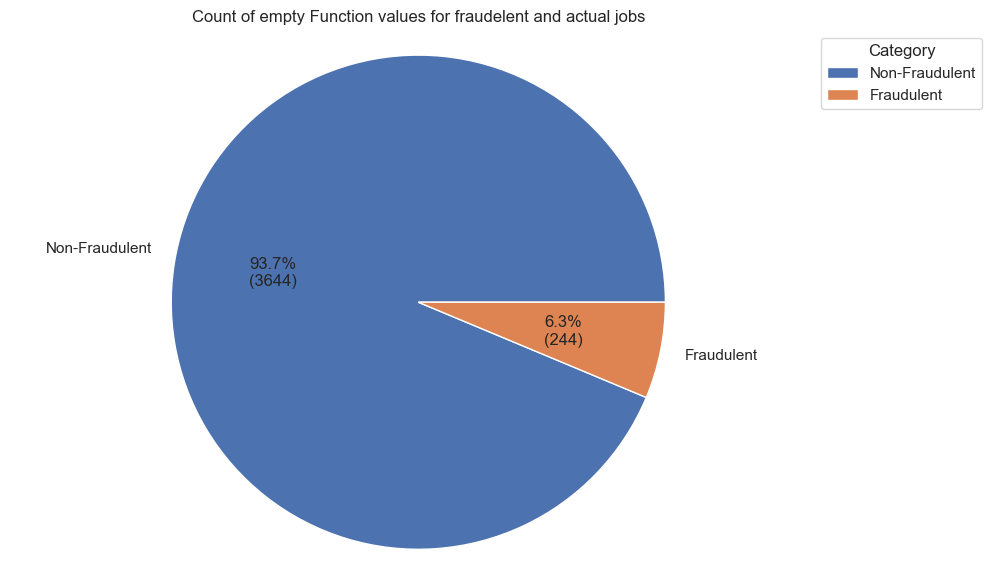

0

In [33]:
plot_missing_values('function', 'Count of empty Function values for fraudelent and actual jobs')

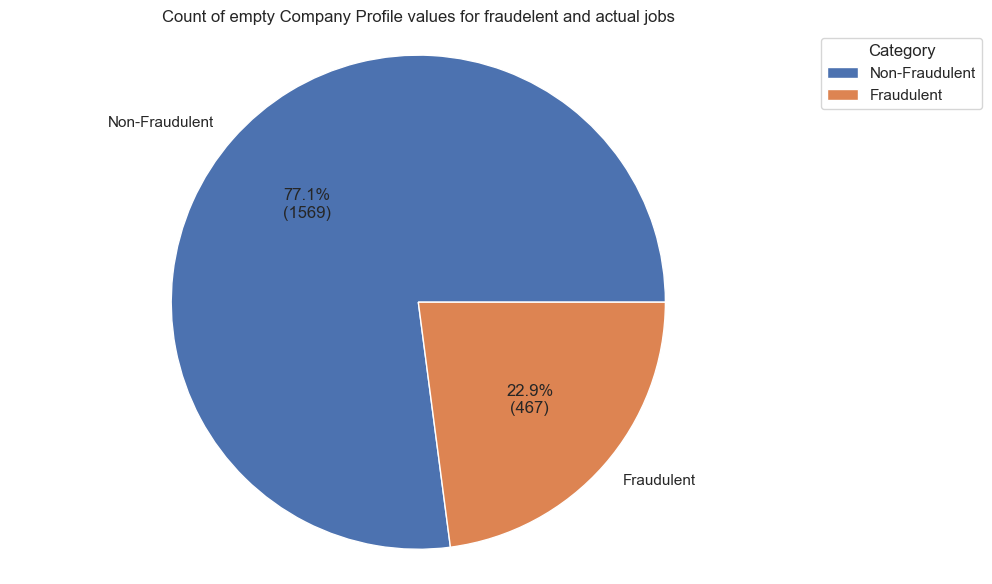

0

In [34]:
plot_missing_values('company_profile', 'Count of empty Company Profile values for fraudelent and actual jobs')

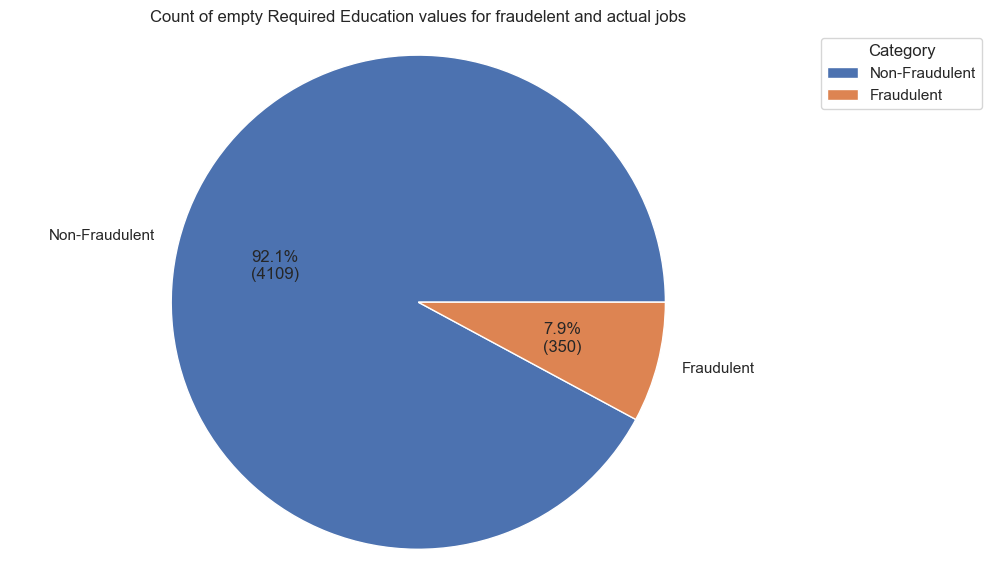

0

In [35]:
plot_missing_values('required_education', 'Count of empty Required Education values for fraudelent and actual jobs')

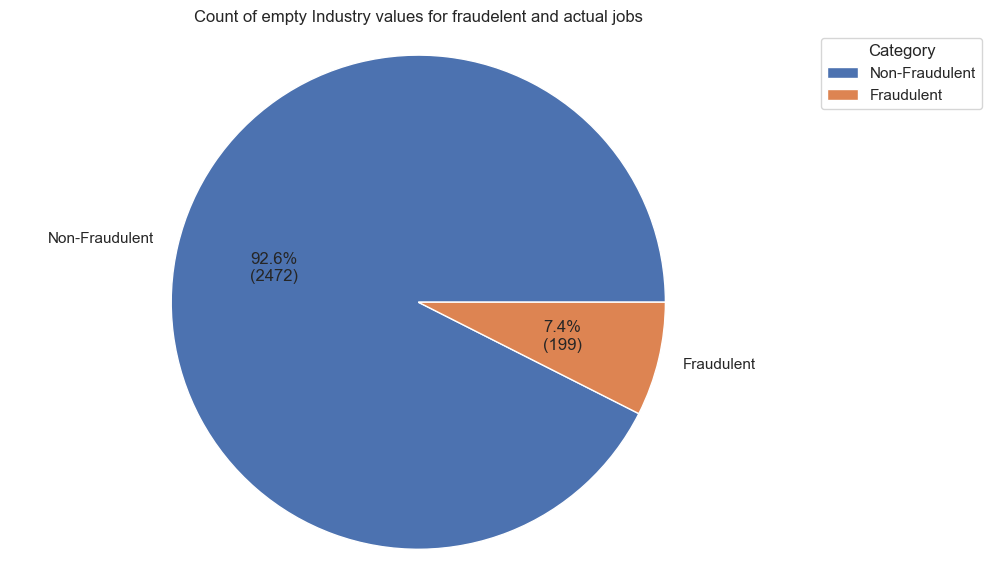

0

In [36]:
plot_missing_values('industry', 'Count of empty Industry values for fraudelent and actual jobs')

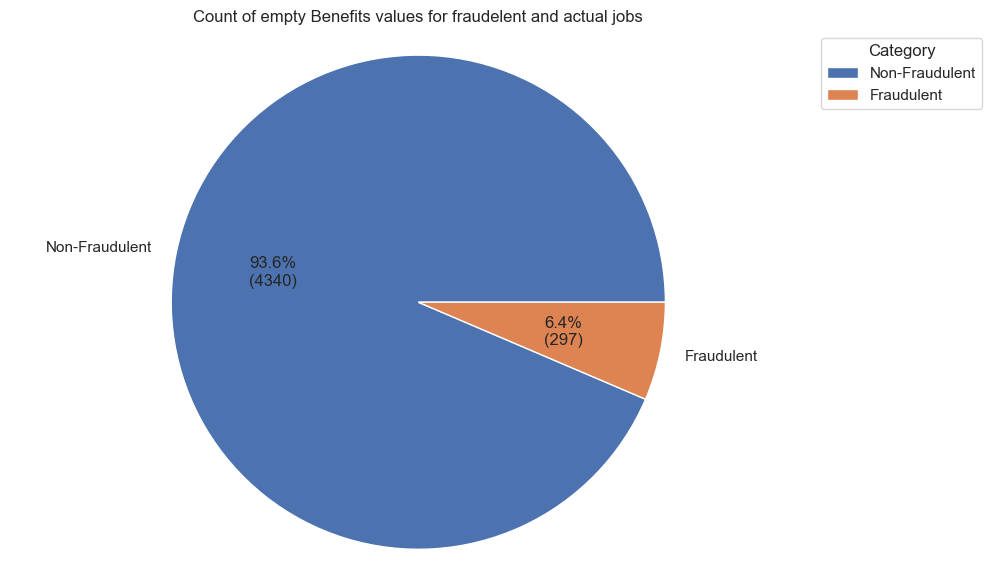

0

In [37]:
plot_missing_values('benefits', 'Count of empty Benefits values for fraudelent and actual jobs')

In [38]:
count_of_fake_jobs = 0

for telecommuting, fraudulent, has_company_logo in zip(fake_postings_US.telecommuting, fake_postings_US.fraudulent, fake_postings_US.has_company_logo):
    if fraudulent == 1 and telecommuting == 0 and has_company_logo == 0:
        count_of_fake_jobs +=1


print(count_of_fake_jobs)

425


In [39]:
count_of_fake_jobs = 0

for has_questions, telecommuting, fraudulent, has_company_logo in zip(fake_postings_US.has_questions, fake_postings_US.telecommuting, fake_postings_US.fraudulent, fake_postings_US.has_company_logo):
    if has_questions == 0 and telecommuting == 0 and fraudulent == 1 and has_company_logo == 0:
        count_of_fake_jobs +=1


print(count_of_fake_jobs)

369


In [40]:
count_of_fake_jobs = 0

for telecommuting, fraudulent in zip(fake_postings_US.telecommuting, fake_postings_US.fraudulent):
    if fraudulent == 1 and telecommuting == 0 :
        count_of_fake_jobs +=1


print(count_of_fake_jobs)

667


In [41]:
fraudulent_postings_US_count = len(fake_postings_US[fake_postings_US.fraudulent == 1])

In [42]:
count_of_fake_jobs/fraudulent_postings_US_count

0.92

In [43]:
(count_of_fake_jobs/fraudulent_postings_US_count) * 100

92.0

In [44]:
fake_postings_US.fillna(" ", inplace=True)

fake_postings_US['summary'] = fake_postings_US['title'] + ' ' + fake_postings_US['location'] + ' ' + \
                               fake_postings_US['company_profile'] + ' ' + \
                               fake_postings_US['description'] + ' ' + fake_postings_US['requirements'] + ' ' + \
                               fake_postings_US['benefits'] + ' ' + \
                               fake_postings_US['required_experience'] + ' ' + fake_postings_US[
                                   'required_education'] + ' ' + fake_postings_US['industry'] + ' ' + \
                               fake_postings_US['function']

fake_postings_US['character_count'] = fake_postings_US.summary.apply(len)


fake_postings_US.drop(
    ['required_experience', 'benefits', 'department', 'state', 'company_profile', 'required_education', 'industry', 'description', 'employment_type', 'address', 'city', 'has_company_logo', 'function', 'location', 'title', 'has_questions', 'salary_range', 'job_id'], axis=1, inplace=True)

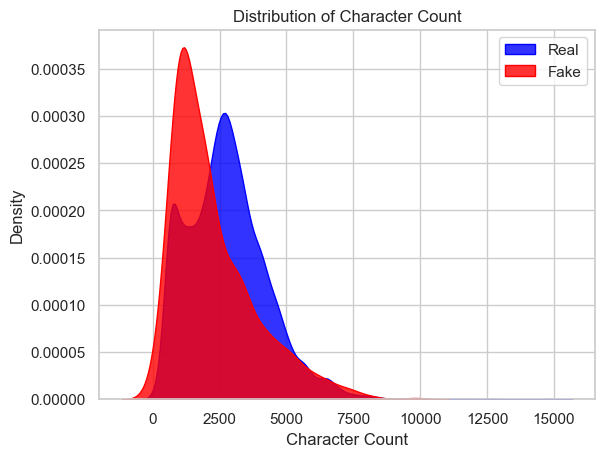

In [45]:
seaborn.kdeplot(
    fake_postings_US[fake_postings_US.fraudulent == 0]['character_count'],
    label='Real',
    color='blue',
    fill=True,
    alpha=0.8
)
seaborn.kdeplot(
    fake_postings_US[fake_postings_US.fraudulent == 1]['character_count'],
    label='Fake',
    color='red',
    fill=True,
    alpha=0.8
)

matplot.legend()
matplot.title('Distribution of Character Count')
matplot.xlabel("Character Count");

In [46]:
fake_postings_US

,requirements,telecommuting,fraudulent,ratio,summary,character_count
0,Experience with content management systems a m...,0,0,0.03,"Marketing Intern US, NY, New York We're Food52...",2705
1,Implement pre-commissioning and commissioning ...,0,0,0.00,"Commissioning Machinery Assistant (CMA) US, IA...",2663
2,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0,0,0.01,"Account Executive - Washington DC US, DC, Wash...",5540
3,QUALIFICATIONS:RN license in the State of Texa...,0,0,0.00,"Bill Review Manager US, FL, Fort Worth SpotSou...",4047
4,,0,0,1.00,"Accounting Clerk US, MD, Job OverviewApex i...",3458
...,...,...,...,...,...,...
10588,BA/BS in Computer Science or a related technic...,0,0,0.02,"Product Manager US, CA, San Francisco Flite de...",2664
10589,REQUIRED SKILLS:Associates Degree or a combina...,0,0,0.05,"Recruiting Coordinator US, NC, Charlotte RES...",2102
10590,,0,0,0.09,"JavaScript Developer US, , Sr, JavaScript D...",584
10591,- B.A. or B.S. in Accounting- Desire to have f...,0,0,0.04,"Payroll Accountant US, PA, Philadelphia WebLin...",4825


** Text Analysis**

In [47]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

[nltk_data] Downloading package punkt to /Users/kusshara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kusshara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kusshara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [48]:
summary = fake_postings_US.summary.to_list()
summary = ' '.join(summary)
tokens_text = word_tokenize(summary)

In [49]:
lower_tokens = [t.lower() for t in tokens_text]
word_freq = Counter(lower_tokens)
print(Counter.most_common(word_freq, 10))

[(',', 248538), ('and', 217658), ('to', 122845), ('the', 109318), ('.', 105032), ('of', 86305), ('a', 79631), ('in', 69807), ('with', 52173), ('for', 49748)]


In [50]:
text_only_alphabets = [t for t in lower_tokens if t.isalpha()]

In [51]:
english_stopped = stopwords.words('english')
no_stops = [t for t in text_only_alphabets if t not in english_stopped]

In [52]:
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
bow = Counter(lemmatized)
print(Counter.most_common(bow, 10))

[('service', 22304), ('experience', 22284), ('work', 20787), ('customer', 19040), ('team', 18650), ('company', 17226), ('u', 17062), ('business', 13857), ('client', 13009), ('sale', 11779)]


In [53]:
fake_postings_US.to_csv('../data/fraudulent_postings_cleaned.csv')

In [54]:
fake_postings_US.shape

(10593, 6)